<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [127]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



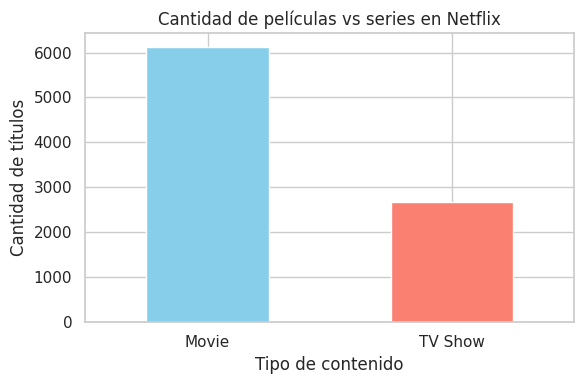

type
Movie      6131
TV Show    2676
Name: count, dtype: int64
¿Cuál es el tipo de contenido predominante en Netflix?
Respuesta: Las peliculas.
¿Qué implicancias podría tener para los usuarios?
Respuesta: Que posiblemente puedan tener mas momentos familiares.


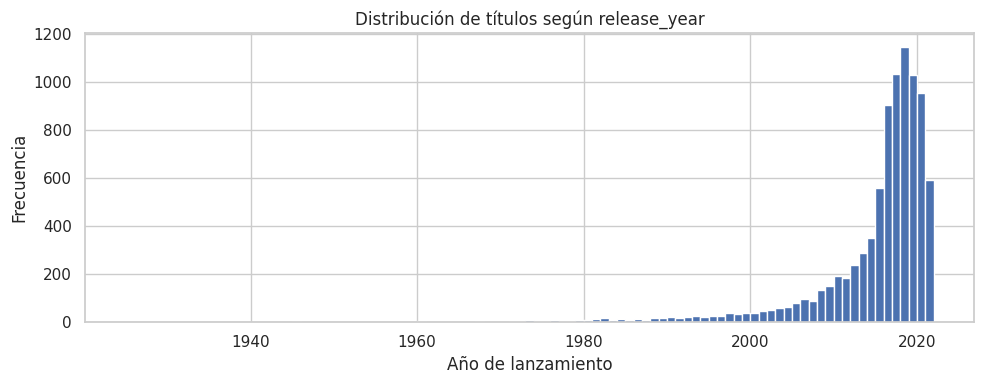

¿Hay más contenido reciente o antiguo?
Respuesta: hay mas contenido nuevo
¿Notas algún patrón en décadas específicas?
Respuesta: Antes de los años 90, casi no hay titulos, la mayor cantidad de titulos se logran visualizar cerca del 2020


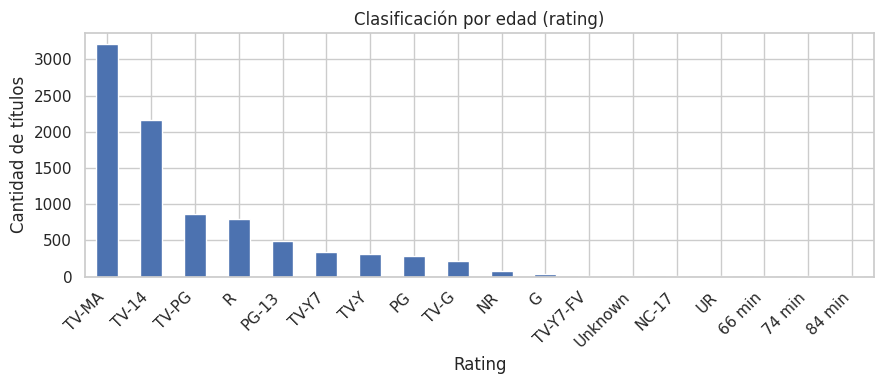

¿Qué clasificación es más común?
Respuesta: La mas comun es la TV-MA
¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?
Está mas enfocado al publico adulto


In [128]:
# Parte 1.1: Distribución de tipos de contenido (Movie vs TV Show)

counts_type = df['type'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(6,4))
counts_type.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Cantidad de películas vs series en Netflix')
plt.xlabel('Tipo de contenido')
plt.ylabel('Cantidad de títulos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(counts_type)
print("¿Cuál es el tipo de contenido predominante en Netflix?" )
print("Respuesta: Las peliculas.")
print("¿Qué implicancias podría tener para los usuarios?")
print("Respuesta: Que posiblemente puedan tener mas momentos familiares.")

# Parte 1.2: Distribución por release_year
import numpy as np
years = df['release_year'].dropna().astype(int)

plt.figure(figsize=(10,4))
bins = np.arange(years.min(), years.max() + 2, 1)  # bin = 1 año
plt.hist(years, bins=bins)
plt.title('Distribución de títulos según release_year')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

print("¿Hay más contenido reciente o antiguo?")
print("Respuesta: hay mas contenido nuevo")
print("¿Notas algún patrón en décadas específicas?")
print("Respuesta: Antes de los años 90, casi no hay titulos, la mayor cantidad de titulos se logran visualizar cerca del 2020")

# Proporción de clasificaciones por edad
rating_counts = (df['rating']
                 .fillna('Unknown')
                 .value_counts()
                 .sort_values(ascending=False))

plt.figure(figsize=(9,4))
rating_counts.plot(kind='bar')
plt.title('Clasificación por edad (rating)')
plt.xlabel('Rating')
plt.ylabel('Cantidad de títulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("¿Qué clasificación es más común?")
print("Respuesta: La mas comun es la TV-MA")
print("¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?")
print("Está mas enfocado al publico adulto")



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


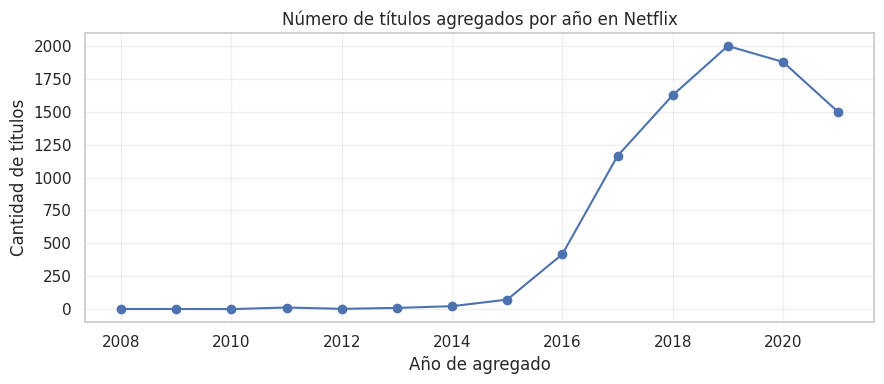

¿Cuándo creció más el catálogo de Netflix?
Respuesta: Creció mas entre los años 2016 y 2017
¿Qué relación podría tener con la expansión internacional de la plataforma?
Respuesta: Coincide con la etapa en que Netflix se expandió internacionalmente


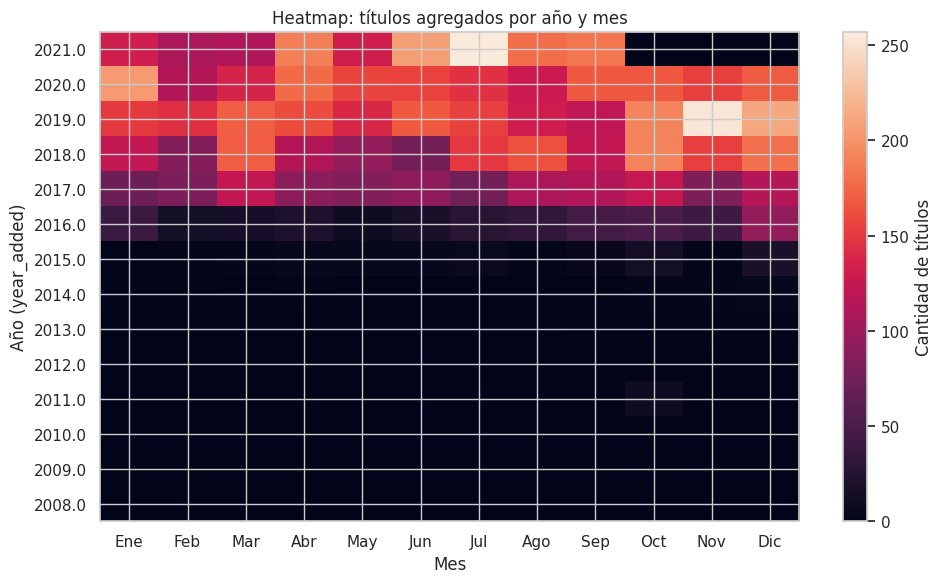

¿Hay meses con más estrenos que otros?
Si, podemos notar que a partir del 2017, julio presenta tonaildades mas claras, por ende tiene mas estrenos
¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?
hay un patrón estacional mas marcado en los meses de invierno, pero tambien podemos notar que la cantidad de lanzamientos ha subido a lo largo de los años 


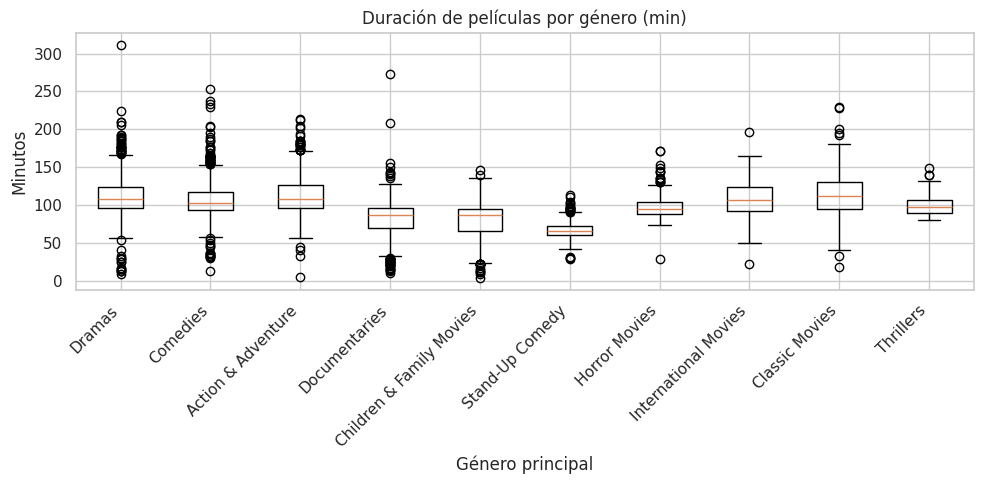

¿Qué géneros suelen durar más?
Respuesta: Classic Movies, Action & Adventure, International Movies y Dramas
¿Qué podrías decir sobre la variabilidad dentro de un mismo género?
Respuesta: la variabilidad cambia mucho por genero, por ejemplo es alta en Classic Movies y bastante baja en Stand-Up Comedy


In [129]:
# Parte 2.1: Número de títulos agregados por año

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Contamos títulos por año en que se agregaron al catálogo
added_per_year = df.groupby(df['date_added'].dt.year)['show_id'].count()

plt.figure(figsize=(9,4))
added_per_year.plot(marker='o')
plt.title('Número de títulos agregados por año en Netflix')
plt.xlabel('Año de agregado')
plt.ylabel('Cantidad de títulos')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("¿Cuándo creció más el catálogo de Netflix?")
print("Respuesta: Creció mas entre los años 2016 y 2017")
print("¿Qué relación podría tener con la expansión internacional de la plataforma?")
print("Respuesta: Coincide con la etapa en que Netflix se expandió internacionalmente")

# Parte 2.2: Heatmap de lanzamientos por año y mes (year_added x month_added)

# Asegurar columnas derivadas desde date_added
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added']  = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Tabla año x mes con conteo de títulos agregados
pivot_heat = (df.dropna(subset=['year_added', 'month_added'])
                .groupby(['year_added', 'month_added'])['show_id']
                .count()
                .unstack(fill_value=0))

# Reordenar meses 1..12 y asegurarnos de que existan todas las columnas
all_months = list(range(1, 13))
pivot_heat = pivot_heat.reindex(columns=all_months, fill_value=0)

# Opcional: ordenar años de menor a mayor
pivot_heat = pivot_heat.sort_index()

# Matriz para el heatmap
Z = pivot_heat.values
years = pivot_heat.index.to_list()
months = all_months
month_labels = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']

plt.figure(figsize=(10,6))
im = plt.imshow(Z, aspect='auto', origin='lower')
plt.colorbar(im, label='Cantidad de títulos')

# Ejes y etiquetas
plt.yticks(ticks=np.arange(len(years)), labels=years)
plt.xticks(ticks=np.arange(len(months)), labels=month_labels, rotation=0)

plt.title('Heatmap: títulos agregados por año y mes')
plt.xlabel('Mes')
plt.ylabel('Año (year_added)')
plt.tight_layout()
plt.show()

print("¿Hay meses con más estrenos que otros?")
print("Si, podemos notar que a partir del 2017, julio presenta tonaildades mas claras, por ende tiene mas estrenos")
print("¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?")
print("hay un patrón estacional mas marcado en los meses de invierno, pero tambien podemos notar que la cantidad de lanzamientos ha subido a lo largo de los años ")


# 1) Derivadas mínimas
df['primary_genre'] = df['listed_in'].str.split(',').str[0].str.strip()
is_movie = df['type'].eq('Movie')
df.loc[is_movie, 'duration_min'] = pd.to_numeric(
    df.loc[is_movie, 'duration'].str.extract(r'(\d+)')[0],
    errors='coerce'
)

# 2) Filtrar solo películas con datos válidos
movies = df[is_movie & df['duration_min'].notna() & df['primary_genre'].notna()].copy()

# 3) Elegir géneros y construir pares
top_genres = movies['primary_genre'].value_counts().head(10).index.tolist()

pairs = []
for g in top_genres:
    vals = movies.loc[movies['primary_genre'] == g, 'duration_min'].astype(float).tolist()
    if len(vals) > 0:
        pairs.append((g, vals))

# 4) Separar labels y data con la misma longitud
labels = [g for g, _ in pairs]
data   = [v for _, v in pairs]

if not data:
    print("No hay datos suficientes para graficar.")
else:
    plt.figure(figsize=(10,5))
    plt.boxplot(data, tick_labels=labels, showfliers=True)
    plt.title('Duración de películas por género (min)')
    plt.xlabel('Género principal')
    plt.ylabel('Minutos')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
print("¿Qué géneros suelen durar más?")
print("Respuesta: Classic Movies, Action & Adventure, International Movies y Dramas")
print("¿Qué podrías decir sobre la variabilidad dentro de un mismo género?")
print("Respuesta: la variabilidad cambia mucho por genero, por ejemplo es alta en Classic Movies y bastante baja en Stand-Up Comedy")



## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



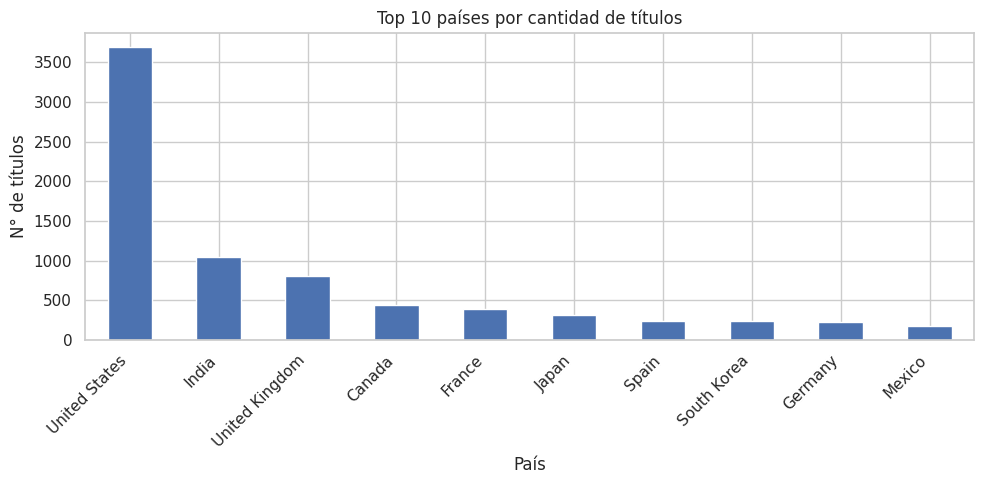

¿Qué países dominan el catálogo?
Respuesta: Domina Estados Unidos, luego le siguen la India y el Reino Unido
¿Sorprende la distribución o es esperada?
Respuesta: A mi parecer la distribucion es esperada, por el tipo de poblacion que tiene estados unidos, y la India y Reino Unido altos por su industria y la expansión global


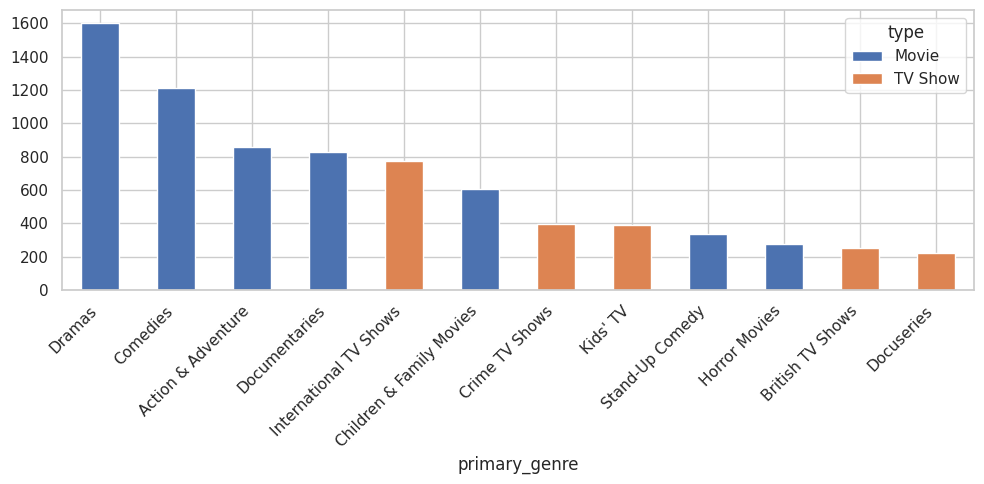

¿Existen géneros más asociados a películas o a series?
Respuesta: Si, por ejemplo en el genero de documentales podemos observar que predominan mas las peliculas que las series


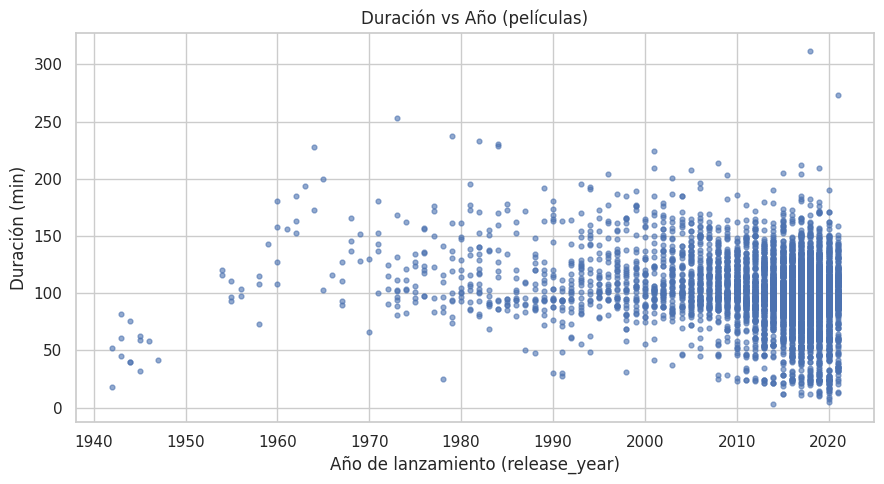

¿Han cambiado los estándares de duración de las películas con el tiempo?
Respuesta: No se ve un cambio fuerte, la mayoría de las películas sigue concentrada en 90–120 min en casi todas las décadas.
¿Se ven outliers interesantes?
Respuesta: si, un outlier interesante por ejemplo es que solo se ve que hay una pelicula que dura mas de 300 minutos


In [130]:
# PARTE 3.1 Top 10 países con más producciones

countries = df['country'].dropna().str.split(',').explode().str.strip()
top10 = countries.value_counts().head(10)

plt.figure(figsize=(10,5))
top10.plot(kind='bar')
plt.title('Top 10 países por cantidad de títulos')
plt.xlabel('País')
plt.ylabel('N° de títulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("¿Qué países dominan el catálogo?")
print("Respuesta: Domina Estados Unidos, luego le siguen la India y el Reino Unido")
print("¿Sorprende la distribución o es esperada?")
print("Respuesta: A mi parecer la distribucion es esperada, por el tipo de poblacion que tiene estados unidos, y la India y Reino Unido altos por su industria y la expansión global")

# PARTE 3.2 Barras apiladas Movie vs TV Show segun género

import matplotlib.pyplot as plt

df['primary_genre'] = df['listed_in'].str.split(',').str[0].str.strip()

stack = (df.dropna(subset=['primary_genre','type'])
           .groupby(['primary_genre','type'])
           .size()
           .unstack(fill_value=0))

stack = stack.loc[stack.sum(axis=1).nlargest(12).index]

stack.plot(kind='bar', stacked=True, figsize=(10,5))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("¿Existen géneros más asociados a películas o a series?")
print("Respuesta: Si, por ejemplo en el genero de documentales podemos observar que predominan mas las peliculas que las series")


# PARTE 3.3:  duración vs año de lanzamiento

movies = df[(df['type']=='Movie') & df['duration'].str.contains('min', na=False)].copy()
movies['duration_min'] = pd.to_numeric(movies['duration'].str.extract(r'(\d+)')[0], errors='coerce')
movies['release_year'] = pd.to_numeric(movies['release_year'], errors='coerce')

movies = movies.dropna(subset=['duration_min', 'release_year'])

plt.figure(figsize=(9,5))
plt.scatter(movies['release_year'], movies['duration_min'], s=12, alpha=0.6)
plt.xlabel('Año de lanzamiento (release_year)')
plt.ylabel('Duración (min)')
plt.title('Duración vs Año (películas)')
plt.tight_layout()
plt.show()

print("¿Han cambiado los estándares de duración de las películas con el tiempo?")
print("Respuesta: No se ve un cambio fuerte, la mayoría de las películas sigue concentrada en 90–120 min en casi todas las décadas.")
print("¿Se ven outliers interesantes?")
print("Respuesta: si, un outlier interesante por ejemplo es que solo se ve que hay una pelicula que dura mas de 300 minutos")

## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

# FIXME

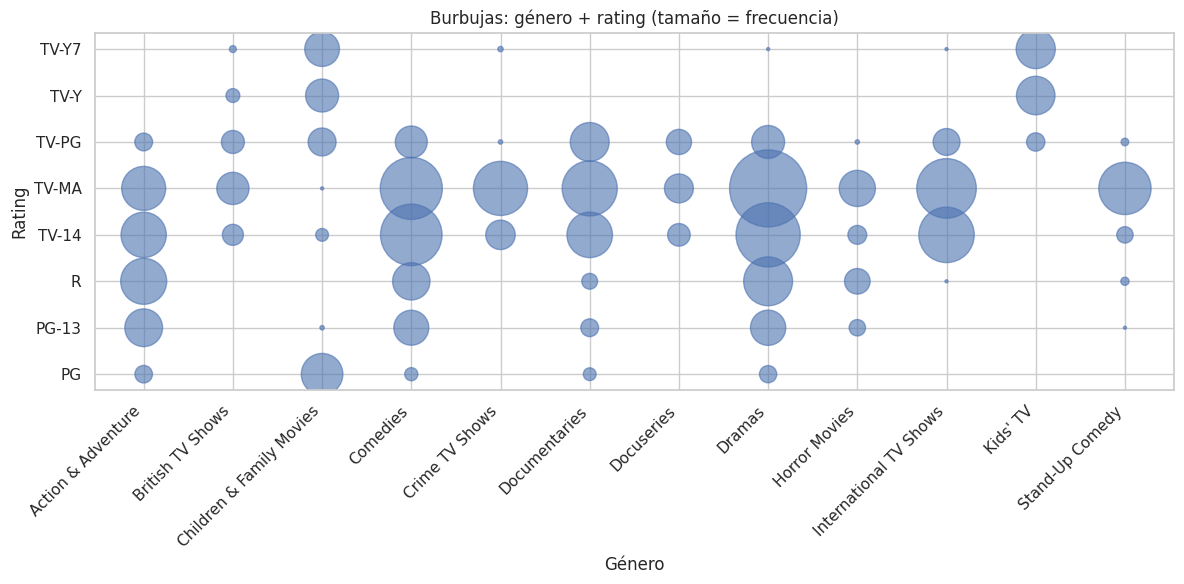

¿Qué géneros están más dirigidos a un público adulto?
Respuesta: Sobre todo Dramas, también Comedies, Horror Movies y Stand-Up Comedy. En series, International y Crime TV Shows. En todos ellos predominan TV-MA/R.
¿Y cuáles a público familiar o infantil?
Respuesta: En infantil predomina Kids TV (TV-Y/TV-Y7) y en familiar/adolescente destacan Children & Family Movies (PG/TV-PG)


In [131]:
# BURBUJAS: combinaciones género + rating

import matplotlib.pyplot as plt

df['primary_genre'] = df['listed_in'].str.split(',').str[0].str.strip()

comb = (df.dropna(subset=['primary_genre','rating'])
          .groupby(['primary_genre','rating']).size()
          .reset_index(name='count'))

# Limitar a los más frecuentes
top_genres  = (comb.groupby('primary_genre')['count'].sum().nlargest(12).index)
top_ratings = (comb.groupby('rating')['count'].sum().nlargest(8).index)
comb = comb[comb['primary_genre'].isin(top_genres) & comb['rating'].isin(top_ratings)]

# Mapear a ejes
gx = {g:i for i,g in enumerate(sorted(top_genres))}
ry = {r:i for i,r in enumerate(sorted(top_ratings))}
comb['x'] = comb['primary_genre'].map(gx)
comb['y'] = comb['rating'].map(ry)

plt.figure(figsize=(12,6))
plt.scatter(comb['x'], comb['y'], s=comb['count']*5, alpha=0.6)
plt.xticks(range(len(gx)), [g for g,_ in sorted(gx.items(), key=lambda x:x[1])], rotation=45, ha='right')
plt.yticks(range(len(ry)), [r for r,_ in sorted(ry.items(), key=lambda x:x[1])])
plt.title('Burbujas: género + rating (tamaño = frecuencia)')
plt.xlabel('Género'); plt.ylabel('Rating')
plt.tight_layout(); plt.show()

print("¿Qué géneros están más dirigidos a un público adulto?")
print("Respuesta: Sobre todo Dramas, también Comedies, Horror Movies y Stand-Up Comedy. En series, International y Crime TV Shows. En todos ellos predominan TV-MA/R.")
print("¿Y cuáles a público familiar o infantil?")
print("Respuesta: En infantil predomina Kids TV (TV-Y/TV-Y7) y en familiar/adolescente destacan Children & Family Movies (PG/TV-PG)")



